In [1]:
from pathlib import Path
import pandas as pd

In [2]:
features_path = Path('./data/processed/features')

In [3]:
h18 = pd.read_csv(features_path / 'human2018_longsquares.csv', index_col=0)
h19 = pd.read_csv(features_path / 'human2019_longsquares.csv', index_col=0)
m18 = pd.read_csv(features_path / 'mouse2018_longsquares.csv', index_col=0)
m19 = pd.read_csv(features_path / 'mouse2019_longsquares.csv', index_col=0)

In [4]:
# meta 
h19meta = pd.read_csv('./data/raw/Metadata/Human19_Metadatav3.csv', index_col=0)
h19meta = h19meta[h19meta.stimulus_type == 'longsquare']
h19meta.rename(columns={'ZD': 'ZD status'}, inplace=True)
h19meta['nwb'] = h19meta['ABF File'].apply(lambda x: x + '.nwb')

h18meta = pd.read_csv('./data/raw/Metadata/Human18_Metadatav2.csv', index_col=0)
h18meta = h18meta[h18meta['Stimulus type'] == 'Long_Square']
h18meta.rename(columns={'ZD': 'ZD status'}, inplace=True)
h18meta['nwb'] = h18meta['ABF File'].apply(lambda x: x + '.nwb')

m19meta = pd.read_csv('./data/raw/Metadata/Mouse19_Metadatav2.csv', index_col=0)
m19meta = m19meta[m19meta.stimulus_type == 'longsquare']
m19meta['nwb'] = m19meta['Cell Name'].apply(lambda x: x + '.nwb')

m18meta = pd.read_csv('./data/raw/Metadata/Mouse18_Metadatav2.csv', index_col=0)
m18meta = m18meta[m18meta.stimulus_type == 'longsquare']
m18meta['nwb'] = m18meta['Cell Name'].apply(lambda x: x + '.nwb')

## Demographics data cleaning

In [5]:
dem19 = pd.read_excel('./data/raw/Demographic_information/Human tissue-2019-Demographic information.xlsx')
dem18 = pd.read_excel('./data/raw/Demographic_information/Human tissue-2018-Demographic information.xlsx')

In [6]:
resection19_map = {
    'R Ant Temp Lobe + Amygdalohippocampectomy': 'Right-ATL',
    'L Ant Temp Lobe + Amygdalohippocampectomy': 'Left-ATL',
    'L Ant Temp Lobectomy ': 'Left-ATL',
    'Left Anterior temporal lobectomy + Amygdalohippocampectomy': 'Left-ATL',
    'L Awake Temp crani for resection with ECoG': 'Unknown', #can craniotomy be considered a lobectomy?
    'Left temporal lobectomy + Amygdalohippocampectomy +/- skull defect repair': 'Left-ATL',
    'Resection of mass from left parietal lobe (update required)': 'Parietal lobe',
    'R awake craniotomy with ECOG (SMA)': 'Unknown', #can craniotomy be considered a lobectomy?
    'R Ant Temp Lobe + Amygdalohippocampectomy + dermoid cyst resection': 'Right-ATL',
    'L Temp crani for tumor resection + ECoG': 'Left-ATL' #can craniotomy be considered a lobectomy?
}

dem19['resection_location'] = dem19['Resection Procedure '].map(resection19_map)


resection18_map = {
    'L ATL + Amyg': 'Left-ATL',
    'R ATL + Amyg': 'Right-ATL',
    'R ATL + Amyg + DNET removal': 'Right-ATL', #DNET: dysembryoplastic neuroepithelial tumor? 
    'R Awake FL Crani for Lesion resection': 'Right-FL', 
    'NOT A RESECTION:  Patient Specific Implant': 'Unknown',
    'R Awake Crani with EcOG': 'Unknown',
    'L ATL + Amyg + lesion with resection of cavernoma': 'Left-ATL',
    'R ATL + Amyg + lesion with resection of cavernoma': 'Right-ATL', 
    'L ATL + Amyg + cavernoma resection': 'Left-ATL',
    'L FL for lesion': 'Left-FL' 
}

dem18['resection_location'] = dem18['Resection Procedure '].map(resection18_map)

In [7]:
# should we change diagnosis column to tumour presence column?
diagnosis18_map = {
    'Medically refractory epilepsy': 'Epilepsy',
    'Medically refractory epilepsy plus non-febrile sz in infancy (TX with phenobarbital)': 'Epilepsy',
    "Can't access; pt expired": 'Unknown',
    'Medically refractory epilepsy + tumor': 'Tumor', #both
    'Cavernous malformation': '',
    'Medically refractory epilepsy; lesion': 'Epilepsy',
    'Left mesial temporal sclerosis': 'Epilepsy',
    'Left temporal tumor, probably DNET; seizures': 'Tumor', #both
    'left sided mesial temporal sclerosis and medically refractory epilepsy': 'Epilepsy',
    'Right sided mesial temporal sclerosis and medically refractory epilepsy': 'Epilepsy',
    'Left MTL cavernoma and medically intractable epilepsy': 'Epilepsy',
    'Right mesiotemporal intraaxial tumor and epilepsy': 'Tumor', #both
    'Left MTL cavernoma resection leading to absence seizures': 'Epilepsy',
    '(likely MRE with tumor)': 'Tumor' #both
    
}

dem18.rename(columns={'Diagnosis': 'Diagnosis_long'}, inplace=True)
dem18['diagnosis'] = dem18['Diagnosis_long'].str.strip().map(diagnosis18_map)


diagnosis19_map = {
    'Medically refractory epilepsy': 'Epilepsy',
    'Emergency Pt.': 'Unknown',
    'Medically refractory epilepsy -likely glioneural hamartoma': 'Tumor', #both
    'Medically refractory epilepsy secondary to underlying dermoid cyst': 'Epilepsy', #unsure?
    'Medically refractory epilepsy with right sided mesial temporal sclerosis': 'Epilepsy',
    'Mesial Temporal Epilepsy': 'Epilepsy'
}

dem19.rename(columns={'Diagnosis': 'Diagnosis_long'}, inplace=True)
dem19['diagnosis'] = dem19['Diagnosis_long'].str.strip().map(diagnosis19_map)



demog_cols = ['PatientId', 'Sex', 'Age At OR ','Years of Seizure history', 'diagnosis', 'Diagnosis_long',
              'SX type', 'resection_location', 'Resection Procedure ', 'Focal cortical dysplasia (FCD)',
              'Other Imaging notes','Antiepileptic Drugs ']

In [8]:
dem19.loc[:, demog_cols]

,PatientId,Sex,Age At OR,Years of Seizure history,diagnosis,Diagnosis_long,SX type,resection_location,Resection Procedure,Focal cortical dysplasia (FCD),Other Imaging notes,Antiepileptic Drugs
0,1901,M,28,13,Epilepsy,Medically refractory epilepsy,GTC; CPS,Left-ATL,Left Anterior temporal lobectomy + Amygdalohip...,not observed,Left mesiotemporal sclerosis and atrophy with ...,CZP
1,1902,F,29,13,Epilepsy,Medically refractory epilepsy,GTC,Unknown,L Awake Temp crani for resection with ECoG,NaN,Left temporal lobe gliosis,"TMP, LEV"
2,1903,F,52,5,Epilepsy,Medically refractory epilepsy,SPS,Left-ATL,Left temporal lobectomy + Amygdalohippocampect...,not observed,possible encephalocele (LATL herniating throug...,"LSC, LTG"
3,1904,M,51,0,Unknown,Emergency Pt.,NaN,Parietal lobe,Resection of mass from left parietal lobe (upd...,NaN,New left parietal tumor; ddx: primary or secon...,No Antiepileptics
4,1905,F,41,32,Epilepsy,Medically refractory epilepsy,CPS,Left-ATL,L Ant Temp Lobe + Amygdalohippocampectomy,not noted,evidence of mesial temporal lobe sclerosis,"LEV, PMP"
5,1906,M,39,12,Epilepsy,Medically refractory epilepsy,"CPS, GTC",Left-ATL,L Ant Temp Lobe + Amygdalohippocampectomy,not noted,Prior resection: left suprafrontal orbital fro...,"CLB, LTG, MJ"
6,1907,M,41,23,Tumor,Medically refractory epilepsy -likely glioneur...,NaN,Right-ATL,R Ant Temp Lobe + Amygdalohippocampectomy,NaN,cysts,"DR, CLB,"
7,1908,F,26,9,Epilepsy,Medically refractory epilepsy,CPS,Unknown,R awake craniotomy with ECOG (SMA),not noted,Prior grid implant (2014) and sEEG (2018); sm...,"ESL, TMP, CLB"
8,1909,F,43,34,Epilepsy,Medically refractory epilepsy secondary to und...,"CPS, GTC",Right-ATL,R Ant Temp Lobe + Amygdalohippocampectomy + de...,not noted,ruptured dermoid cyst,"LTG, LSC"
9,1910,F,36,16,Epilepsy,Medically refractory epilepsy,CPS,Left-ATL,L Temp crani for tumor resection + ECoG,"possible, adjacent to tumor","No blooming, MTS unremarkable",LTG


In [9]:
idmap_h19 = {
    "2019_11_04_0098": 1912,
    "2019_11_04_0128": 1912,
    "2019_11_26_0103": 1913,
    "2019_11_28_0016": 1914,
    "2019_11_28_0054": 1914,
    "2019_11_28_0090": 1914,
    "2019_11_28_0114": 1914,
    "2019_11_28_0127": 1914,
    "19228030": 1906,
    "19228044": 1906,
    "19228058": 1906,
    "19228068": 1906,
    "19122003": 1901,
    "19122026": 1901,
    "19128006": 1902,
    "19128040": 1902,
    "19128061": 1902, 
    "19128068": 1902,
    "19129058": 1903,
    "19129072": 1903,
    "19129014": 1903,
    "19129022": 1903,
    "19129024": 1903,
    "19129037": 1903,
    "19129040": 1903,
    "19129043": 1903,
    "19129047": 1903,
    "19319025": 1907,
    "19320001": 1908,
    "19320007": 1908,
    "19320017": 1908,
    "19320022": 1908,
    "19320025": 1908,
    "19320030": 1908,
    "19320041": 1908,
    "19328001": 1909,
    "19328009": 1909,
    "19328019": 1909,
    "19328034": 1909,
    "19328039": 1909,
    "19328046": 1909,
    "2019_11_04_0001": 1912,
    "2019_11_04_0083": 1912,
    "2019_11_26_0006": 1913,
    "2019_11_26_0019": 1913,
    "2019_11_26_0037": 1913,
    "2019_11_26_0094": 1913,
    "2019_11_26_0110": 1913,
    "2019_11_28_0010": 1914,
    "2019_11_28_0038": 1914,
    "2019_11_28_0079": 1914,
    "2019_11_28_0119": 1914,
    "19o10010": 1911,
    "19o10045": 1911,
    "19o10054": 1911,
    "19o10065": 1911
    }


idmap_h18 = {
    "18320005": 1808, #case1
    "18320015": 1808, #case1
    "18320021": 1808, #case1
    "18320014": 1809, #case2
    "18320019": 1809, #case2
    "18320031": 1809, #case2
    "18426010": 1815, #could be case 1816?
    "18426017": 1815, #could be case 1816?
    "18201004": 1802,
    "18201011": 1802,
    "18201028": 1802,
    "18220008": 1803,
    "18220019": 1803,
    "18129004": 1801,
    "18129009": 1801,
    "18329051": 1813,
    "18329062": 1813,
    "18329014": 1813,
    "18329044": 1813,
    "18o22001": 1822,
    "18o22010": 1822,
    "18o22020": 1822
    }

In [10]:
h19meta['PatientId'] = h19meta['ABF File'].map(idmap_h19)
h18meta['PatientId'] = h18meta['ABF File'].map(idmap_h18)

In [11]:
h18meta

,ABF File,Data Type,Exp. Date,Case #,Cell #,Cell Layer,Stim Type,Threshold,Gain Value,ZD status,Hold,Unnamed: 12,Gain,Offset,Response Channel,Command Channel,RMP,Stimulus type,nwb,PatientId
9,18320005,Human,March_20_2018,First,C1,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-20.0,Iclamp(mV),Current_in(pA),-70.5,Long_Square,18320005.nwb,1808
13,18320015,Human,March_20_2018,First,C2,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-20.0,Iclamp(mV),Current_in(pA),-68.1,Long_Square,18320015.nwb,1808
19,18320021,Human,March_20_2018,First,C3,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-27.0,Iclamp(mV),Current_in(pA),-71.3,Long_Square,18320021.nwb,1808
30,18320014,Human,March_20_2018,Second,C2,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-17.2,Iclamp(mV),Current_in(pA),-65.2,Long_Square,18320014.nwb,1809
33,18320019,Human,March_20_2018,Second,C3,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-18.2,Iclamp(mV),Current_in(pA),-66.2,Long_Square,18320019.nwb,1809
41,18320031,Human,March_20_2018,Second,C5,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-14.4,Iclamp(mV),Current_in(pA),-62.4,Long_Square,18320031.nwb,1809
64,18426010,Human,April_26_2018,n.a,C1,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-15.3,Iclamp(mV),Current_in(pA),-65.3,Long_Square,18426010.nwb,1815
71,18426017,Human,April_26_2018,n.a,C2,L23,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-14.5,Iclamp(mV),Current_in(pA),-64.5,Long_Square,18426017.nwb,1815
76,18201004,Human,Feb_01_2018,n.a,C1,L5,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-20.1,Iclamp(mV),Current_in(pA),-60.1,Long_Square,18201004.nwb,1802
80,18201011,Human,Feb_01_2018,n.a,C3,L5,Firing,n.a,n.a,n.a,n.a,NaN,1.0,-16.5,Iclamp(mV),Current_in(pA),-66.5,Long_Square,18201011.nwb,1802


In [12]:
print(h19meta.columns)
print(h18meta.columns)
print(m19meta.columns)
print(m18meta.columns)

Index(['ABF File', 'Data Type', 'Exp. Date', 'Cell #', 'Cell Layer',
       'Stim Type', 'Threshold', 'DC', 'ZD status', 'Hold', 'Gain', 'Offset',
       'Response Channel', 'Command Channel', 'RMP', 'stimulus_type', 'nwb',
       'PatientId'],
      dtype='object')
Index(['ABF File', 'Data Type', 'Exp. Date', 'Case #', 'Cell #', 'Cell Layer',
       'Stim Type', 'Threshold', 'Gain Value', 'ZD status', 'Hold',
       'Unnamed: 12', 'Gain', 'Offset', 'Response Channel', 'Command Channel',
       'RMP', 'Stimulus type', 'nwb', 'PatientId'],
      dtype='object')
Index(['Cell Name', 'Data Type', 'Exp. Date', 'Cell #', 'Cell Layer',
       'Stim Type', 'ZD status', 'stimulus_type', 'Gain', 'Offset',
       'Response Channel', 'Command Channel', 'RMP', 'nwb'],
      dtype='object')
Index(['Cell Name', 'Data Type', 'Exp. Date', 'Cell #', 'Cell Layer',
       'Stim Type', 'ZD status', 'stimulus_type', 'Gain', 'Offset',
       'Response Channel', 'Command Channel', 'RMP', 'nwb'],
      dtype='

In [13]:
cols_to_select = ['Data Type', 'Exp. Date', 'Cell #', 'Cell Layer', 'ZD status', 'RMP', 'nwb']
hcols_to_select = cols_to_select + ['PatientId']

In [14]:
h19v2 = h19.merge(h19meta.loc[:, hcols_to_select], left_index=True, right_on='nwb').set_index('nwb')
h18v2 = h18.merge(h18meta.loc[:, hcols_to_select], left_index=True, right_on='nwb').set_index('nwb')
m19v2 = m19.merge(m19meta.loc[:, cols_to_select], left_index=True, right_on='nwb').set_index('nwb')
m18v2 = m18.merge(m18meta.loc[:, cols_to_select], left_index=True, right_on='nwb').set_index('nwb')

In [15]:
h19meta['Cell Layer'].value_counts()

L5        34
L3C       11
L3         4
L2         3
L23        3
L5-Int     1
Name: Cell Layer, dtype: int64

## Merge in demographics to the human recordings dataframes

In [16]:
h19v3 = h19v2.reset_index().merge(dem19.loc[:, demog_cols], on='PatientId').set_index('nwb')
h18v3 = h18v2.reset_index().merge(dem18.loc[:, demog_cols], on='PatientId').set_index('nwb')

# Get natcom data in same format
- Merge in recordings metadata to extracted features
- Merge in patient metadata

In [17]:
natcom_feats = pd.read_csv(features_path / 'natcom_longsquares.csv', index_col=0)

In [18]:
natcom_feats.shape

(90, 26)

## Read in recordings metadata

In [19]:
nat_com_meta_url = 'https://raw.githubusercontent.com/stripathy/valiante_lab_abf_process/master/output_files/cell_final_raw_meta_df.csv'
nat_com_meta = pd.read_csv(nat_com_meta_url, index_col=0)
nat_com_meta['cell_id'] = nat_com_meta.cell_id.apply(lambda x: x.rstrip('.abf')) + '.nwb'

In [20]:
nat_com_meta.columns

Index(['cell_id', 'expt_date', 'layer_name', 'cell_type', 'recorder_name',
       'full_path', 'abf_tag', 'abf_version', 'file_time', 'num_sweeps',
       'resp_chan', 'resp_gain', 'resp_offset', 'resp_sampling_rate',
       'rmp_error', 'rmp_val', 'stim_amp_vec', 'stim_chan', 'stim_duration',
       'stim_end_time', 'stim_gain', 'stim_name', 'stim_path',
       'stim_sampling_rate', 'stim_start_time', 'valid_stim'],
      dtype='object')

In [21]:
natcom_feats

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
15o08032.nwb,0.025671,12.254771,0.045904,0.185785,0.024992,0.078591,0.085178,150.000000,-46.544189,51.179199,...,0.476385,0.517801,0.063552,-59.161621,100.000000,0.024064,0.080064,-80.827637,51.609583,0.012116
2016_03_03_0103.nwb,0.158713,11.111593,0.013561,0.468069,0.073623,0.084861,0.103924,249.999985,-37.310596,50.152786,...,0.392656,0.393016,0.015541,-65.452423,200.000000,0.037880,0.097288,-84.393112,43.874104,0.017017
2016_02_29_0065.nwb,-0.002228,29.167931,0.040622,0.090739,0.023041,0.032983,0.033031,100.000000,-39.903942,38.625420,...,0.300432,0.301692,0.072363,-63.777344,50.000000,0.175765,0.167399,-98.093346,213.170767,0.028196
19320017.nwb,0.232653,6.667778,0.061800,0.372042,0.063800,0.107767,0.102000,150.024414,-33.044117,41.464554,...,0.566500,0.647600,NaN,-73.134575,99.487305,0.059596,0.025747,-98.031296,94.525866,0.012607
19320001.nwb,0.307538,8.337502,0.018900,0.531679,0.052800,0.100975,0.115450,148.803711,-39.222244,53.749565,...,0.298800,0.299000,0.030500,-64.493660,99.975586,0.066464,0.109240,-101.981644,84.223703,0.015239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320024.nwb,NaN,3.333889,0.077100,0.000000,0.051200,0.077100,0.077100,199.951172,-39.413799,49.880638,...,0.488800,0.540600,NaN,-76.193100,149.902344,0.028565,0.066192,-98.602646,75.450905,0.010458
19129047.nwb,0.086530,13.373454,0.030200,0.294825,0.028100,0.067171,0.072000,249.755859,-41.258205,54.719585,...,0.237400,0.237800,0.052100,-66.979088,199.707031,0.060016,0.089398,-94.480865,65.147266,0.009334
2016_03_01_0000.nwb,0.145762,8.333694,0.043022,0.374860,0.036241,0.101152,0.110884,350.000000,-44.517334,58.473389,...,0.310692,0.343574,0.072723,-61.950840,300.000000,0.038386,0.111151,-71.842773,24.020238,0.008042
15o08002.nwb,0.082053,6.535878,0.058145,0.299605,0.048149,0.161088,0.164847,150.000000,-45.566212,46.224560,...,0.520657,0.682750,0.760583,-63.438057,100.000000,0.046939,0.294718,-88.992722,60.462601,0.018802


In [22]:
natcom_df = natcom_feats.merge(nat_com_meta.loc[:, ['cell_id', 'expt_date', 'layer_name', 'cell_type', 'rmp_val']], left_index=True, right_on='cell_id').set_index('cell_id')

In [23]:
# extract demographics data from Shreejoys repo
demog_url = 'https://raw.githubusercontent.com/stripathy/valiante_ih/master/summary_tables/cells_w_demographic_data.csv'
demog_df = pd.read_csv(demog_url, index_col=0)

In [24]:
demog_df.columns

Index(['cell_id', 'layer_name', 'cell_type', 'recorder_name', 'subject_id',
       'acquisition_time', 'voltage_drift', 'has_morphology', 'tag_comments',
       'resection_date', 'age', 'sex', 'seizure_duration', 'unique_subject',
       'diagnosis', 'resection_location', 'drugs', 'Diagnosis_long',
       'Resection_location_long', 'has_burst', 'rin', 'rmp', 'apamp', 'ahpamp',
       'aphw', 'apvel', 'sagamp', 'adratio', 'first_isi', 'avgisi', 'cvisi',
       'sag', 'fislope', 'latency', 'avg_rate', 'tau', 'rheo', 'apthr',
       'peak_t', 'fast_trough_t', 'trough_t', 'res_center_freq',
       'res_3dB_freq', 'res_sharpness', 'has_resonance'],
      dtype='object')

In [25]:
demog_df.Resection_location_long.value_counts()

Left ATL                                                                                                              17
Right-ATL                                                                                                             15
Right ATL                                                                                                             12
right side resection of tumor, (to parietoccipital sulcus) frontal lobectomy                                           8
lesionectomy (side not described)                                                                                      8
None noted in MRI notes                                                                                                7
right amygdalohippocamectomy                                                                                           6
left side lesionectomy and temporal pole resection                                                                     6
left frontotemporal craniotomy f

In [26]:
demog_df.loc[:, ['resection_location', 'Resection_location_long']]

,resection_location,Resection_location_long
1,Right-ATL,R temporal lobectomy and cranioplasty
2,Right-ATL,Bifrontal implant of subdural strips and depth...
3,Right-ATL,Right ATL
4,Right-ATL,Right ATL
5,Right-ATL,Right ATL
...,...,...
156,Left-ATL,Left ATL
157,Right-ATL,Right-ATL
158,Right-ATL,Right-ATL
159,Right-ATL,Right-ATL


In [27]:
demog_df['cell_id'] = demog_df.cell_id.str.rstrip('.abf') + '.nwb'

In [28]:
# select demographic cols to keep
demog_df = demog_df.loc[:, ['cell_id', 'layer_name', 'cell_type', 'recorder_name', 'subject_id',
       'acquisition_time', 'voltage_drift', 'has_morphology', 'tag_comments',
       'resection_date', 'age', 'sex', 'seizure_duration', 'unique_subject',
       'diagnosis', 'resection_location', 'drugs', 'Diagnosis_long',
       'Resection_location_long']]

In [29]:
# 83 of the 90 cells with features extracted have associated demographic info
demog_df[demog_df.cell_id.isin(natcom_feats.index)].shape

(83, 19)

In [30]:
natcom_merged = natcom_df.merge(demog_df.loc[:, ['cell_id', 'subject_id', 'sex', 'age', 'seizure_duration', 'diagnosis', 'drugs', 'resection_location']], left_index=True, right_on='cell_id').set_index('cell_id')

In [31]:
natcom_merged['Data Type'] = 'Human'

In [32]:
natcom_merged.rename(columns={'rmp_val': 'RMP', 
                              'seizure_duration': 'seizure_duration_years'}, inplace=True)

In [33]:
h18v3.rename(columns={'PatientId': 'subject_id', 
                      'Sex': 'sex',
                      'Cell Layer': 'layer_name',
                      'Age At OR ' : 'age',
                      'Years of Seizure history': 'seizure_duration_years', 
                      #'Diagnosis': 'diagnosis',
                      'Antiepileptic Drugs ': 'drugs',
                      'Exp. Date': 'expt_date'}, inplace=True)  #'Focal cortical dysplasia (FCD)', 'Other Imaging notes', 'SX type',

h19v3.rename(columns={'PatientId': 'subject_id', 
                      'Sex': 'sex',
                      'Cell Layer': 'layer_name',
                      'Age At OR ' : 'age',
                      'Years of Seizure history': 'seizure_duration_years', 
                      #'Diagnosis': 'diagnosis',
                      'Antiepileptic Drugs ': 'drugs',
                      'Exp. Date': 'expt_date'}, inplace=True)  #'Focal cortical dysplasia (FCD)', 'Other Imaging notes', 'SX type',

m19v2.rename(columns={'Cell Layer': 'layer_name',
                      'Exp. Date': 'expt_date'}, inplace=True)

m18v2.rename(columns={'Cell Layer': 'layer_name',
                      'Exp. Date': 'expt_date'}, inplace=True)

cols_to_select = ['Data Type', 'expt_date', 'layer_name', 'RMP', 'subject_id','sex', 
                  'age', 'seizure_duration_years', 'diagnosis', 'resection_location', 'drugs', 'Cell #', 
                  'ZD status', 'adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi','median_isi', 
                  'stim_amp', 'threshold_v', 'peak_v', 'trough_v','fast_trough_v', 'adp_v', 'width',
                  'upstroke_downstroke_ratio','peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi',
                  'v_baseline','rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance', 'tau']


In [34]:
h18v3.loc[:, cols_to_select] 

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
nwb,,,,,,,,,,,,,,,,,,,,,
18329051.nwb,Human,March_29_2018,L23,-69.7,1813,F,22,12,Epilepsy,Left-ATL,...,0.0949,0.0968,0.1404,-70.285637,119.995110,2.509849e-02,0.061095,-101.604301,151.975691,0.039749
18329044.nwb,Human,March_29_2018,L23-Int,-69.7,1813,F,22,12,Epilepsy,Left-ATL,...,0.9506,0.9499,NaN,-72.119659,40.527340,-1.426853e-03,-0.001794,-99.566406,217.879400,0.010943
18329014.nwb,Human,March_29_2018,L23,-61.5,1813,F,22,12,Epilepsy,Left-ATL,...,0.0720,0.0756,0.2659,-56.980747,40.527340,-1.255821e-02,0.045000,-101.059578,348.484844,0.017329
18329062.nwb,Human,March_29_2018,L23,-61.2,1813,F,22,12,Epilepsy,Left-ATL,...,0.1057,0.1065,NaN,-61.387821,120.727539,1.443880e-18,0.042225,-100.733688,220.364735,0.032334
18o22020.nwb,Human,October_ 22_2018,L23,-68.4,1822,F,40,10,Tumor,Right-ATL,...,0.1018,0.1018,0.0103,-66.685791,80.200195,1.078060e-01,0.128195,-101.771851,247.364461,0.025225
18o22001.nwb,Human,October_ 22_2018,L23,-74.5,1822,F,40,10,Tumor,Right-ATL,...,0.1153,0.1153,0.0940,-77.198006,200.317383,4.987858e-02,0.044544,-99.593147,113.425925,0.023102
18o22010.nwb,Human,October_ 22_2018,L23,-71.6,1822,F,40,10,Tumor,Right-ATL,...,0.1214,0.1215,0.0107,-73.110077,80.322266,1.143007e-01,0.067623,-100.906502,210.567817,0.021900
18129004.nwb,Human,Jan_29_2018,L5,-71.2,1801,M,30,4,Epilepsy,Right-ATL,...,0.0812,0.0817,0.0221,-67.309868,59.448246,-5.995664e-02,0.204884,-98.071579,238.524944,0.025054
18129009.nwb,Human,Jan_29_2018,L5,-69.4,1801,M,30,4,Epilepsy,Right-ATL,...,0.1531,0.1562,0.0721,-70.427307,20.751951,-5.531673e-02,0.114557,-102.304298,366.114348,0.041006


In [35]:
h18v3.layer_name.value_counts()

L23        14
L5          5
L23-Int     1
Name: layer_name, dtype: int64

In [36]:
natcom_merged['Cell #'] = 1
natcom_merged['ZD status'] = 'n.a'
natcom_merged.loc[:, cols_to_select]

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
cell_id,,,,,,,,,,,,,,,,,,,,,
15o08032.nwb,Human,2015-10-08,L5,-60.500000,X2015.10.08,M,21,2,Epilepsy,Parietal lobe,...,0.476385,0.517801,0.063552,-59.161621,100.000000,0.024064,0.080064,-80.827637,51.609583,0.012116
2016_03_03_0103.nwb,Human,2016-03-03,L2.3,-65.700000,X2016.03.03,F,26,25,Epilepsy,Right-ATL,...,0.392656,0.393016,0.015541,-65.452423,200.000000,0.037880,0.097288,-84.393112,43.874104,0.017017
2016_02_29_0065.nwb,Human,2016-02-29,L5,-61.800000,X2016.02.29,F,47,4,Epilepsy,Left-ATL,...,0.300432,0.301692,0.072363,-63.777344,50.000000,0.175765,0.167399,-98.093346,213.170767,0.028196
19320017.nwb,Human,2019-03-20,L2.3,-73.200000,X2019.03.20,F,26,9,Epilepsy,Right-ATL,...,0.566500,0.647600,NaN,-73.134575,99.487305,0.059596,0.025747,-98.031296,94.525866,0.012607
19320001.nwb,Human,2019-03-20,L5,-65.800000,X2019.03.20,F,26,9,Epilepsy,Right-ATL,...,0.298800,0.299000,0.030500,-64.493660,99.975586,0.066464,0.109240,-101.981644,84.223703,0.015239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320024.nwb,Human,2019-03-20,L3c,-75.900000,X2019.03.20,F,26,9,Epilepsy,Right-ATL,...,0.488800,0.540600,NaN,-76.193100,149.902344,0.028565,0.066192,-98.602646,75.450905,0.010458
19129047.nwb,Human,2019-01-29,L3c,-67.100000,X2019.01.29,F,52,6,Epilepsy,Left-ATL,...,0.237400,0.237800,0.052100,-66.979088,199.707031,0.060016,0.089398,-94.480865,65.147266,0.009334
2016_03_01_0000.nwb,Human,2016-03-01,L2.3,-65.500000,X2016.03.01,M,52,13,Epilepsy,Left-ATL,...,0.310692,0.343574,0.072723,-61.950840,300.000000,0.038386,0.111151,-71.842773,24.020238,0.008042


## find overlap of NatCom data with other human data

In [37]:
# there are overlapping files from human19 dataset and the natcoms data
# drop them from h19
h19v3 = h19v3[~h19v3.index.isin(natcom_merged.index)]

## Concatenate the full human tables

In [38]:
human_df = pd.concat([h19v3.loc[:, cols_to_select] , h18v3.loc[:, cols_to_select] , natcom_merged.loc[:, cols_to_select] ])

In [39]:
human_df.shape

(139, 39)

In [75]:
human_df.iloc[0]

Data Type                          Human
expt_date                    Jan_28_2019
layer_name                            L5
RMP                                -65.4
subject_id                          1902
sex                                    F
age                                   29
seizure_duration_years                13
diagnosis                       Epilepsy
resection_location               Unknown
drugs                           TMP, LEV
Cell #                                C2
ZD status                            n.a
adapt                           0.167628
avg_rate                        8.334722
first_isi                         0.0617
isi_cv                          0.335561
latency                           0.0551
mean_isi                        0.125575
median_isi                        0.1341
stim_amp                      199.951172
threshold_v                    -41.86692
peak_v                         53.729397
trough_v                      -45.086525
fast_trough_v   

In [84]:
human_df.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique()#.shape#.sum()

(36, 1)

In [85]:
human_df['ZD status'].value_counts()

n.a    131
ZD       8
Name: ZD status, dtype: int64

In [41]:
human_df.sex.value_counts()

F     76
M     61
M      2
Name: sex, dtype: int64

In [42]:
# fix up messy values 
human_df.sex = human_df.sex.map({'F': 'F', 'M ': 'M', 'M': 'M'})

In [43]:
human_df.to_csv(features_path / 'human_features_w_demogs.csv')

## Add solutions info to dfs before concatenating

In [44]:
# solutions metadata for converted nwbs
solutions_df = pd.read_csv('./data/raw/Metadata/extracted_features_Solutions.csv', usecols=['nwb', 'Extra-Solution', 'Internal-solution'])

In [45]:
solutions_df.rename(columns={'Extra-Solution': 'external_soln', 
                             'Internal-solution': 'internal_soln'}, inplace=True)

In [46]:
solutions_df.internal_soln.value_counts()

Potassium gluconate    95
Name: internal_soln, dtype: int64

In [47]:
converted_features = pd.concat([h19v3.loc[:, cols_to_select], h18v3.loc[:, cols_to_select], m19v2, m18v2])

In [74]:
m19v2 

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,sag,vm_for_sag,input_resistance,tau,Data Type,expt_date,Cell #,layer_name,ZD status,RMP
nwb,,,,,,,,,,,,,,,,,,,,,
19o23003.nwb,-0.005551,16.668056,0.05940,0.039541,0.03285,0.058878,0.05990,100.000000,-46.539307,15.289307,...,0.080303,-95.794678,151.367187,0.014257,Mouse,Oct 23_2019,C2,L5,n.a,-66.0
19o23001.nwb,0.015317,18.334861,0.04265,0.089746,0.03295,0.053325,0.05520,100.000000,-44.036865,28.839111,...,0.061384,-89.569084,117.797852,0.013181,Mouse,Oct 23_2019,C1,L5,n.a,-62.0
19o23010.nwb,0.023962,16.668056,0.04875,0.097611,0.02325,0.062678,0.06335,250.000000,-37.170410,17.089844,...,0.099885,-95.825195,92.163086,0.005935,Mouse,Oct 23_2019,C3,L5,n.a,-73.5
19o23039.nwb,0.029927,16.668056,0.04125,0.128442,0.04085,0.060044,0.06255,150.000000,-48.217773,32.928467,...,0.108956,-101.867676,121.154785,0.017404,Mouse,Oct 23_2019,C6,L5,n.a,-72.0
19o09016.nwb,0.011659,15.001250,0.00315,1.212308,0.03560,0.057762,0.00375,200.000000,-44.616699,29.449463,...,0.154122,-99.914551,102.539062,0.011248,Mouse,Oct 09_ 2019_4AP,C4,L5,n.a,-74.5
2019_10_24_0037.nwb,0.031296,33.336111,0.01370,0.259743,0.01340,0.028918,0.02765,150.000000,-41.656494,13.275146,...,0.141218,-97.198486,208.435059,0.015607,Mouse,Oct 24_ 2019_CA,C2,L5,n.a,-64.0
19o08018.nwb,0.031704,15.001250,0.04570,0.136279,0.02255,0.066306,0.06960,200.000000,-39.184570,32.775879,...,0.102026,-99.060059,120.239258,0.010264,Mouse,Oct 08_ 2019_KA,C3,L5,n.a,-67.8
19o08027.nwb,0.018105,18.334861,0.04425,0.194618,0.01125,0.054420,0.05340,200.000000,-41.473389,37.200928,...,0.046664,-98.358154,142.517090,0.006500,Mouse,Oct 08_ 2019_KA,C4,L5,n.a,-68.2
19o22018.nwb,0.021133,28.335695,0.02095,0.139971,0.02690,0.035416,0.03635,150.000000,-36.224365,32.867432,...,0.156991,-102.050774,169.982910,0.008777,Mouse,Oct 22_2019,C3,L5,Before ZD,-75.0


In [48]:
converted_features.head()

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
nwb,,,,,,,,,,,,,,,,,,,,,
19128006.nwb,Human,Jan_28_2019,L5,-65.4,1902.0,F,29.0,13,Epilepsy,Unknown,...,0.2932,0.3320,0.1430,-65.453194,150.634766,0.056708,0.098792,-90.740829,69.612592,0.019236
19128040.nwb,Human,Jan_28_2019,L5,-64.1,1902.0,F,29.0,13,Epilepsy,Unknown,...,0.2198,0.2198,0.0610,-67.906494,100.952148,-0.028572,0.010225,-101.818710,132.281557,0.019539
19129043.nwb,Human,Jan_29_2019,L3,-65.8,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.2360,0.2371,0.0654,-66.645554,99.975586,-0.033360,0.096724,-99.677567,136.642158,0.011900
19129058.nwb,Human,Jan_29_2019,L2,-67.7,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.2834,0.3048,0.1384,-67.263435,100.341797,0.021499,0.072916,-101.334518,154.268295,0.013612
19129072.nwb,Human,Jan_29_2019,L3,-67.2,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.2608,0.2607,0.0080,-67.436668,49.926758,-0.026436,0.071281,-97.376755,215.725645,0.023927


In [49]:
converted_features.shape

(77, 39)

In [50]:
converted_features = converted_features.merge(solutions_df, left_index=True, right_on='nwb').set_index('nwb')

In [51]:
# adds cols for the natcoms data. solutions were regular aCSF and potassium gluconate 
natcom_merged['external_soln'] = 'aCSF'
natcom_merged['internal_soln'] = 'Potassium gluconate'

In [52]:
natcom_merged.columns

Index(['adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi',
       'median_isi', 'stim_amp', 'threshold_v', 'peak_v', 'trough_v',
       'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio',
       'peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance',
       'tau', 'expt_date', 'layer_name', 'cell_type', 'RMP', 'subject_id',
       'sex', 'age', 'seizure_duration_years', 'diagnosis', 'drugs',
       'resection_location', 'Data Type', 'Cell #', 'ZD status',
       'external_soln', 'internal_soln'],
      dtype='object')

In [53]:
# concatenate the full tables that have all the same columns
cols_to_select = ['Data Type',
 'expt_date',
 'layer_name',
 'RMP',
 'subject_id',
 'sex',
 'age',
 'seizure_duration_years',
 'diagnosis',
 'resection_location',
 'drugs',
 'Cell #',
 'ZD status',
 'internal_soln',
 'external_soln',
 'adapt',
 'avg_rate',
 'first_isi',
 'isi_cv',
 'latency',
 'mean_isi',
 'median_isi',
 'stim_amp',
 'threshold_v',
 'peak_v',
 'trough_v',
 'fast_trough_v',
 'adp_v',
 'width',
 'upstroke_downstroke_ratio',
 'peak_t',
 'fast_trough_t',
 'trough_t',
 'rheo_first_isi',
 'v_baseline',
 'rheobase_i',
 'fi_fit_slope',
 'sag',
 'vm_for_sag',
 'input_resistance',
 'tau']

In [54]:
all_features = pd.concat([converted_features.loc[:, cols_to_select], natcom_merged.loc[:, cols_to_select]])

In [55]:
all_features[all_features.external_soln == 'aCSF']

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
19129043.nwb,Human,Jan_29_2019,L3,-65.800000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.236000,0.237100,0.065400,-66.645554,99.975586,-0.033360,0.096724,-99.677567,136.642158,0.011900
19129058.nwb,Human,Jan_29_2019,L2,-67.700000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.283400,0.304800,0.138400,-67.263435,100.341797,0.021499,0.072916,-101.334518,154.268295,0.013612
19129072.nwb,Human,Jan_29_2019,L3,-67.200000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.260800,0.260700,0.008000,-67.436668,49.926758,-0.026436,0.071281,-97.376755,215.725645,0.023927
15o08032.nwb,Human,2015-10-08,L5,-60.500000,X2015.10.08,M,21.0,2,Epilepsy,Parietal lobe,...,0.476385,0.517801,0.063552,-59.161621,100.000000,0.024064,0.080064,-80.827637,51.609583,0.012116
2016_03_03_0103.nwb,Human,2016-03-03,L2.3,-65.700000,X2016.03.03,F,26.0,25,Epilepsy,Right-ATL,...,0.392656,0.393016,0.015541,-65.452423,200.000000,0.037880,0.097288,-84.393112,43.874104,0.017017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320024.nwb,Human,2019-03-20,L3c,-75.900000,X2019.03.20,F,26.0,9,Epilepsy,Right-ATL,...,0.488800,0.540600,NaN,-76.193100,149.902344,0.028565,0.066192,-98.602646,75.450905,0.010458
19129047.nwb,Human,2019-01-29,L3c,-67.100000,X2019.01.29,F,52.0,6,Epilepsy,Left-ATL,...,0.237400,0.237800,0.052100,-66.979088,199.707031,0.060016,0.089398,-94.480865,65.147266,0.009334
2016_03_01_0000.nwb,Human,2016-03-01,L2.3,-65.500000,X2016.03.01,M,52.0,13,Epilepsy,Left-ATL,...,0.310692,0.343574,0.072723,-61.950840,300.000000,0.038386,0.111151,-71.842773,24.020238,0.008042
15o08002.nwb,Human,2015-10-08,L5,-63.700000,X2015.10.08,M,21.0,2,Epilepsy,Parietal lobe,...,0.520657,0.682750,0.760583,-63.438057,100.000000,0.046939,0.294718,-88.992722,60.462601,0.018802


In [56]:
all_features.layer_name.value_counts()

L5         90
L2.3       25
L23        14
L3c        14
L3C        10
L3          2
L2          2
L23-Int     1
Name: layer_name, dtype: int64

In [57]:
layers = {'L5': 'L5', 'L23': 'L23', 'L2.3': 'L23', 'L3C': 'L3C', 'L3c': 'L3C', 'L2': 'L23', 'L3': 'L23', 'L23-Int': 'Int', 'L5-Int': 'Int'}
# add extra column so to keep the granular info in orig col
all_features['aggregated_cell_layer'] = all_features.layer_name.map(layers)

In [58]:
import missingno as msno

<AxesSubplot:>

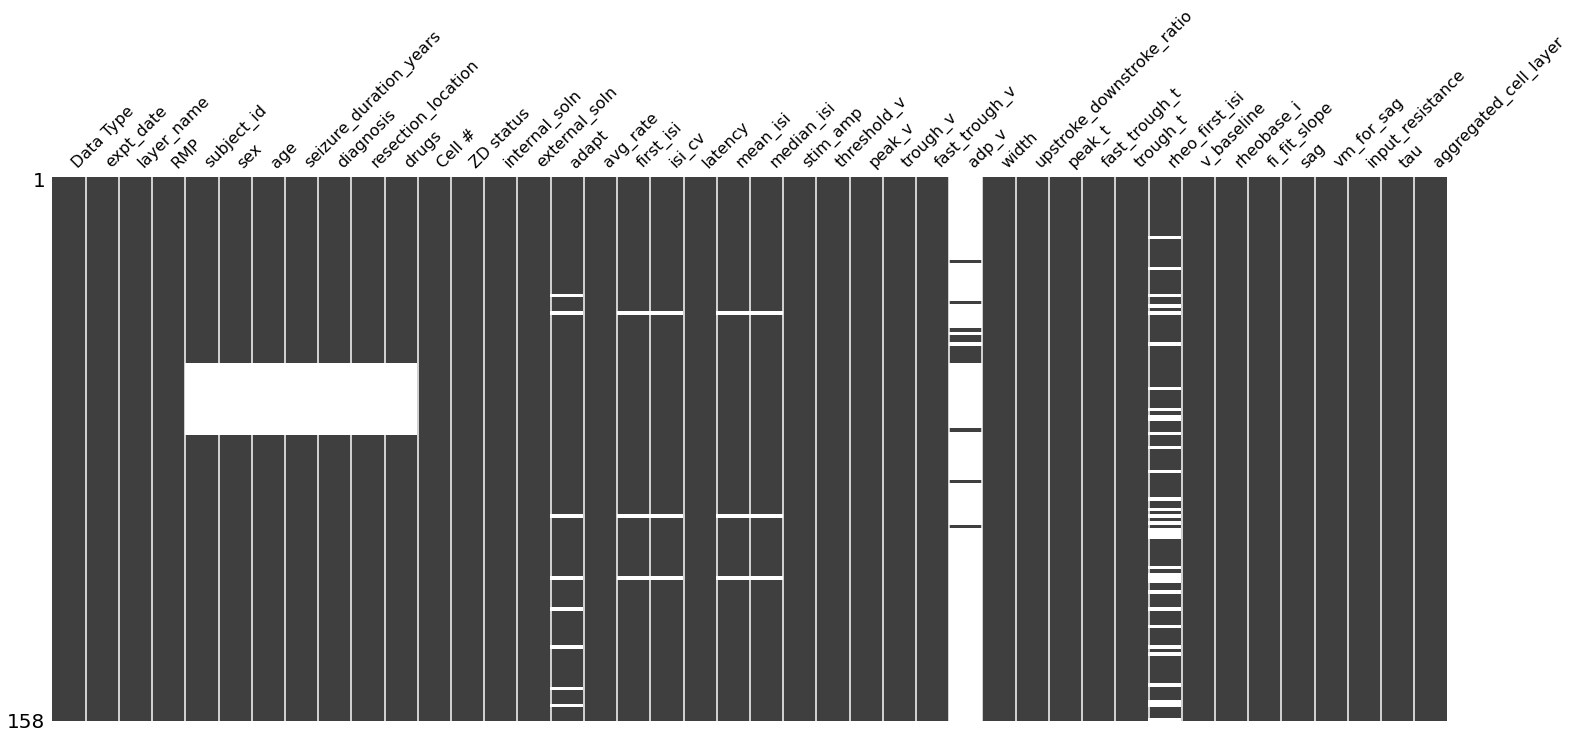

In [59]:
msno.matrix(all_features, sparkline=False)

# Plotting for basic QC

In [60]:
import matplotlib.pyplot as plt

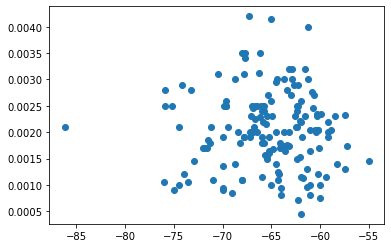

In [61]:
plt.scatter(x=all_features.RMP, y=all_features.width)

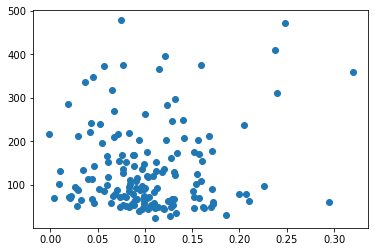

In [62]:
plt.scatter(x=all_features.sag, y=all_features.input_resistance)

In [63]:
discarded_ir_outliers = all_features[all_features.input_resistance < 20000]

In [64]:
discarded_ir_outliers['AHP'] = discarded_ir_outliers.threshold_v - discarded_ir_outliers.fast_trough_v

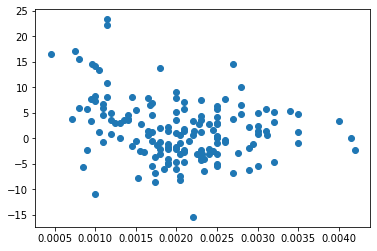

In [65]:
plt.scatter(x=discarded_ir_outliers.width, y=discarded_ir_outliers.AHP)

In [137]:
discarded_ir_outliers.to_csv('./data/processed/features/all_features_wide.csv', index=None)

In [66]:
#sex, age, treatment, tumor vs epilepsy, layer, class of cell?, morphology?
#include external solutions
tidydf = discarded_ir_outliers.melt(id_vars=['Data Type' ,'layer_name', 'aggregated_cell_layer', 'sex', 'age', 
                                             'internal_soln', 'external_soln', 'seizure_duration_years', 
                                             'diagnosis', 'resection_location'], 
                                    value_vars=['RMP', 'adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi', 
                                                'median_isi','stim_amp', 'threshold_v', 'peak_v', 'trough_v', 
                                                'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio', 
                                                'peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi', 'v_baseline',
                                                'rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance',
                                                'tau', 'AHP'], 
                                    var_name='feature')

In [67]:
tidydf.to_csv('./data/processed/features/tidyfeatures.csv', index=None)

# Summarizing the dataset for table 1

In [87]:
human_summary = discarded_ir_outliers[discarded_ir_outliers['Data Type'] == 'Human']
mouse_summary = discarded_ir_outliers[discarded_ir_outliers['Data Type'] == 'Mouse']

In [89]:
human_summary

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau,aggregated_cell_layer,AHP
19128006.nwb,Human,Jan_28_2019,L5,-65.400000,1902.0,F,29.0,13,Epilepsy,Unknown,...,0.143000,-65.453194,150.634766,0.056708,0.098792,-90.740829,69.612592,0.019236,L5,1.220703
19128040.nwb,Human,Jan_28_2019,L5,-64.100000,1902.0,F,29.0,13,Epilepsy,Unknown,...,0.061000,-67.906494,100.952148,-0.028572,0.010225,-101.818710,132.281557,0.019539,L5,-0.564575
19129043.nwb,Human,Jan_29_2019,L3,-65.800000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.065400,-66.645554,99.975586,-0.033360,0.096724,-99.677567,136.642158,0.011900,L23,2.899170
19129058.nwb,Human,Jan_29_2019,L2,-67.700000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.138400,-67.263435,100.341797,0.021499,0.072916,-101.334518,154.268295,0.013612,L23,4.852295
19129072.nwb,Human,Jan_29_2019,L3,-67.200000,1903.0,F,52.0,5,Epilepsy,Left-ATL,...,0.008000,-67.436668,49.926758,-0.026436,0.071281,-97.376755,215.725645,0.023927,L23,-4.714966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320024.nwb,Human,2019-03-20,L3c,-75.900000,X2019.03.20,F,26.0,9,Epilepsy,Right-ATL,...,NaN,-76.193100,149.902344,0.028565,0.066192,-98.602646,75.450905,0.010458,L3C,6.561279
19129047.nwb,Human,2019-01-29,L3c,-67.100000,X2019.01.29,F,52.0,6,Epilepsy,Left-ATL,...,0.052100,-66.979088,199.707031,0.060016,0.089398,-94.480865,65.147266,0.009334,L3C,3.631592
2016_03_01_0000.nwb,Human,2016-03-01,L2.3,-65.500000,X2016.03.01,M,52.0,13,Epilepsy,Left-ATL,...,0.072723,-61.950840,300.000000,0.038386,0.111151,-71.842773,24.020238,0.008042,L23,-0.555416
15o08002.nwb,Human,2015-10-08,L5,-63.700000,X2015.10.08,M,21.0,2,Epilepsy,Parietal lobe,...,0.760583,-63.438057,100.000000,0.046939,0.294718,-88.992722,60.462601,0.018802,L5,-3.668209


In [104]:
human_summary.iloc[0]

Data Type                                  Human
expt_date                            Jan_28_2019
layer_name                                    L5
RMP                                        -65.4
subject_id                                1902.0
sex                                            F
age                                         29.0
seizure_duration_years                        13
diagnosis                               Epilepsy
resection_location                       Unknown
drugs                                   TMP, LEV
Cell #                                        C2
ZD status                                    n.a
internal_soln                Potassium gluconate
external_soln                  Synaptic Blockers
adapt                                   0.167628
avg_rate                                8.334722
first_isi                                 0.0617
isi_cv                                  0.335561
latency                                   0.0551
mean_isi            

In [105]:
human_summary.external_soln.value_counts()

aCSF                 86
Synaptic Blockers    51
Name: external_soln, dtype: int64

In [109]:
human_summary_blockers = human_summary[human_summary.external_soln == 'Synaptic Blockers']
human_summary_acsf = human_summary[human_summary.external_soln == 'aCSF']

In [129]:
human_summary_acsf.layer_name.value_counts()

L5      44
L2.3    25
L3c     14
L3       2
L2       1
Name: layer_name, dtype: int64

In [132]:
human_summary_acsf.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique()#.shape#

,Cell #
subject_id,
1903.0,3
X2015.10.08,1
X2015.11.09,1
X2016.01.28,1
X2016.02.04,1
X2016.02.25,1
X2016.02.29,1
X2016.03.01,1
X2016.03.03,1


In [134]:
human_summary_acsf.loc[:, ['subject_id', 'layer_name', 'Cell #']].groupby('layer_name').count()#nunique()#.shape#

,subject_id,Cell #
layer_name,,
L2,1,1
L2.3,25,25
L3,2,2
L3c,14,14
L5,44,44


In [135]:
human_summary_acsf.loc[:, ['subject_id', 'layer_name', 'Cell #']].groupby('layer_name').nunique()#nunique()#.shape#

,subject_id,Cell #
layer_name,,
L2,1,1
L2.3,7,1
L3,1,2
L3c,6,1
L5,14,1


In [113]:
human_summary_acsf.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()

Cell #    21
dtype: int64

In [114]:
human_summary_blockers.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()

Cell #    48
dtype: int64

In [115]:
human_summary_blockers.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().shape#

(17, 1)

In [91]:
human_summary['ZD status'].value_counts()

n.a    129
ZD       8
Name: ZD status, dtype: int64

In [103]:
human_summary.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()#.shape#

Cell #    69
dtype: int64

In [88]:
mouse_summary

,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,diagnosis,resection_location,...,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau,aggregated_cell_layer,AHP
19o23003.nwb,Mouse,Oct 23_2019,L5,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20835,-65.897621,50.000000,0.129773,0.080303,-95.794678,151.367187,0.014257,L5,10.803223
19o23001.nwb,Mouse,Oct 23_2019,L5,-62.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27560,-61.993191,50.000000,0.159537,0.061384,-89.569084,117.797852,0.013181,L5,8.148193
19o23010.nwb,Mouse,Oct 23_2019,L5,-73.5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11745,-73.428566,200.000000,0.163347,0.099885,-95.825195,92.163086,0.005935,L5,13.458252
19o23039.nwb,Mouse,Oct 23_2019,L5,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11640,-72.532143,100.000000,0.088103,0.108956,-101.867676,121.154785,0.017404,L5,1.190186
19o09016.nwb,Mouse,Oct 09_ 2019_4AP,L5,-74.5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00335,-74.604988,150.000000,0.085721,0.154122,-99.914551,102.539062,0.011248,L5,-10.925293
2019_10_24_0037.nwb,Mouse,Oct 24_ 2019_CA,L5,-64.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02710,-63.478596,100.000000,0.159537,0.141218,-97.198486,208.435059,0.015607,L5,7.690430
19o08018.nwb,Mouse,Oct 08_ 2019_KA,L5,-67.8,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09720,-69.053650,150.000000,0.093341,0.102026,-99.060059,120.239258,0.010264,L5,2.258301
19o08027.nwb,Mouse,Oct 08_ 2019_KA,L5,-68.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-72.415161,150.000000,0.102866,0.046664,-98.358154,142.517090,0.006500,L5,-0.732422
19o22018.nwb,Mouse,Oct 22_2019,L5,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.14515,-73.844910,100.000000,0.193349,0.156991,-102.050774,169.982910,0.008777,L5,5.828857
19o22031.nwb,Mouse,Oct 22_2019,L5,-70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03710,-68.525185,100.000000,0.129773,0.065576,-96.862793,317.077637,0.022442,L5,3.356934


In [118]:
mouse_summary.iloc[0]

Data Type                                  Mouse
expt_date                            Oct 23_2019
layer_name                                    L5
RMP                                        -66.0
subject_id                                   NaN
sex                                          NaN
age                                          NaN
seizure_duration_years                       NaN
diagnosis                                    NaN
resection_location                           NaN
drugs                                        NaN
Cell #                                        C2
ZD status                                    n.a
internal_soln                Potassium gluconate
external_soln                  Synaptic Blockers
adapt                                  -0.005551
avg_rate                               16.668056
first_isi                                 0.0594
isi_cv                                  0.039541
latency                                  0.03285
mean_isi            

In [116]:
mouse_summary.external_soln.value_counts()

Synaptic Blockers    21
Name: external_soln, dtype: int64

In [119]:
mouse_summary.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique()

,Cell #
subject_id,


In [125]:
mouse_summary.expt_date.value_counts().sort_index()

Feb 08_2018         3
Jan 18_2018         1
Jan 30_2018         1
Oct 08_ 2019_KA     4
Oct 09_ 2019_4AP    2
Oct 22_2019         3
Oct 23_2019         5
Oct 24_ 2019_CA     2
Name: expt_date, dtype: int64

In [127]:
mouse_summary.loc[:, ['expt_date', 'Cell #']].groupby('expt_date').nunique()

,Cell #
expt_date,
Feb 08_2018,3
Jan 18_2018,1
Jan 30_2018,1
Oct 08_ 2019_KA,4
Oct 09_ 2019_4AP,2
Oct 22_2019,2
Oct 23_2019,5
Oct 24_ 2019_CA,2


In [126]:
mouse_summary['Cell #'].value_counts()

C3    5
C2    4
C4    4
C1    3
C6    2
C7    1
C8    1
C5    1
Name: Cell #, dtype: int64

In [121]:
mouse_summary.iloc[0]

Data Type                                  Mouse
expt_date                            Oct 23_2019
layer_name                                    L5
RMP                                        -66.0
subject_id                                   NaN
sex                                          NaN
age                                          NaN
seizure_duration_years                       NaN
diagnosis                                    NaN
resection_location                           NaN
drugs                                        NaN
Cell #                                        C2
ZD status                                    n.a
internal_soln                Potassium gluconate
external_soln                  Synaptic Blockers
adapt                                  -0.005551
avg_rate                               16.668056
first_isi                                 0.0594
isi_cv                                  0.039541
latency                                  0.03285
mean_isi            